# Task
Statistical Model

For Store 1 – Build prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

## Libraries and versions

In [1]:
#!pip install pandas=='1.2.3'

import pandas as pd

print(f'Pandas version {pd.__version__}')

Pandas version 1.2.3


In [2]:
#!pip install seaborn=='0.11.1'

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Accent')
print(f'Seaborn version {sns.__version__}')

Seaborn version 0.11.0


In [3]:
#!pip install numpy=='0.19.2'

import numpy as np

print(f'Numpy version {np.__version__}')

Numpy version 1.19.2


In [4]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

In [5]:
import statsmodels.api as sm

print(f'Statsmodels version {sm.__version__}')

Statsmodels version 0.12.2


In [6]:
#Libraries for model
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# dataset

In [7]:
#use the new dataset created in EDA
dataset = pd.read_csv('Walmart_Store_sales_new.csv')
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter,Semester
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,Q1,S1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,Q1,S1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Q1,S1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Q1,S1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,Q1,S1


In [8]:
#select data for Store 1
store_1 = dataset.query('Store==1')
store_1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter,Semester
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,Q1,S1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,Q1,S1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Q1,S1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Q1,S1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,Q1,S1


## EDA for Store 1

### dataset info

In [9]:
store_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Date          143 non-null    object 
 2   Weekly_Sales  143 non-null    float64
 3   Holiday_Flag  143 non-null    int64  
 4   Temperature   143 non-null    float64
 5   Fuel_Price    143 non-null    float64
 6   CPI           143 non-null    float64
 7   Unemployment  143 non-null    float64
 8   Day           143 non-null    int64  
 9   Month         143 non-null    int64  
 10  Year          143 non-null    int64  
 11  Quarter       143 non-null    object 
 12  Semester      143 non-null    object 
dtypes: float64(5), int64(5), object(3)
memory usage: 15.6+ KB


In [10]:
store_1.sort_values(['Year','Month','Day'], inplace=True)
store_1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Quarter,Semester
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,Q1,S1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,Q1,S1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Q1,S1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Q1,S1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,Q1,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,28-09-2012,1437059.26,0,76.08,3.666,222.981658,6.908,28,9,2012,Q3,S2
139,1,05-10-2012,1670785.97,0,68.55,3.617,223.181477,6.573,5,10,2012,Q4,S2
140,1,12-10-2012,1573072.81,0,62.99,3.601,223.381296,6.573,12,10,2012,Q4,S2
141,1,19-10-2012,1508068.77,0,67.97,3.594,223.425723,6.573,19,10,2012,Q4,S2


### cleaning dataset

In [11]:
#drop some columns
store_1.drop(columns=['Store', 'Quarter', 'Semester'], inplace=True)

#sort dataframe from Date
store_1.sort_values(['Year','Month','Day'], inplace=True)

#create column 'Week_number'
store_1['Week_Number'] = np.asarray([x for x in range(1,144)])

store_1

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Week_Number
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,1
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,2
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,3
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,4
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,5
...,...,...,...,...,...,...,...,...,...,...,...
138,28-09-2012,1437059.26,0,76.08,3.666,222.981658,6.908,28,9,2012,139
139,05-10-2012,1670785.97,0,68.55,3.617,223.181477,6.573,5,10,2012,140
140,12-10-2012,1573072.81,0,62.99,3.601,223.381296,6.573,12,10,2012,141
141,19-10-2012,1508068.77,0,67.97,3.594,223.425723,6.573,19,10,2012,142


### basic statistics

In [12]:
store_1.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Week_Number
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.00000
mean,1.555264e+06,0.069930,68.306783,3.219699,215.996892,7.610420,15.678322,6.447552,2010.965035,72.00000
std,1.559808e+05,0.255926,14.250486,0.427313,4.350890,0.383749,8.785873,3.249438,0.799759,41.42463
min,1.316899e+06,0.000000,35.400000,2.514000,210.337426,6.573000,1.000000,1.000000,2010.000000,1.00000
25%,1.458105e+06,0.000000,58.265000,2.764500,211.549277,7.348000,8.000000,4.000000,2010.000000,36.50000
50%,1.534850e+06,0.000000,69.640000,3.290000,215.459905,7.787000,16.000000,6.000000,2011.000000,72.00000
75%,1.614892e+06,0.000000,80.485000,3.594000,220.531330,7.838000,23.000000,9.000000,2012.000000,107.50000
max,2.387950e+06,1.000000,91.650000,3.907000,223.444251,8.106000,31.000000,12.000000,2012.000000,143.00000


### Weekly_Sales

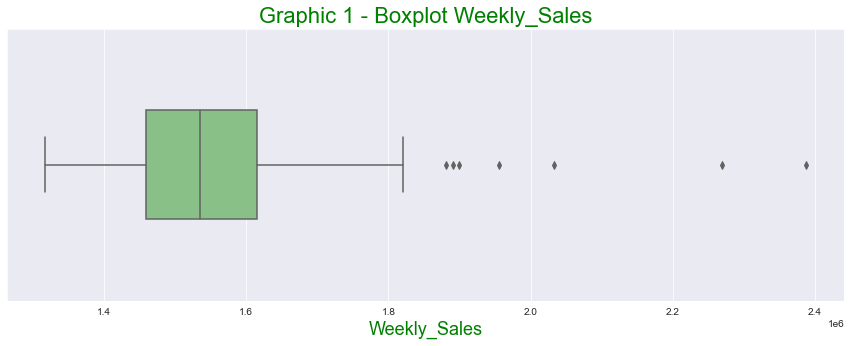

In [13]:
graphic1 = sns.boxplot(store_1['Weekly_Sales'], width=0.4)
graphic1.figure.set_size_inches(15,5)
graphic1.set_title('Graphic 1 - Boxplot Weekly_Sales', color='g', fontsize=22)
graphic1.set_xlabel('Weekly_Sales', color='g', fontsize=18)
graphic1 = graphic1

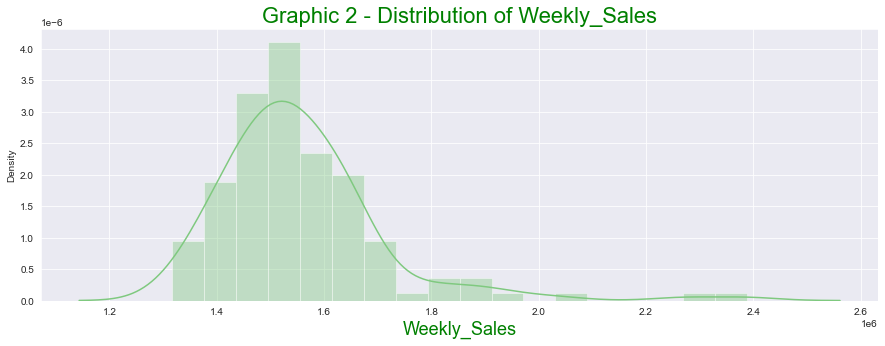

In [14]:
graphic2 = sns.distplot(store_1['Weekly_Sales'])
graphic2.figure.set_size_inches(15,5)
graphic2.set_title('Graphic 2 - Distribution of Weekly_Sales', color='g', fontsize=22)
graphic2.set_xlabel('Weekly_Sales', color='g', fontsize=18)
graphic2 = graphic2

### Weekly_Sales x Holiday_Flag

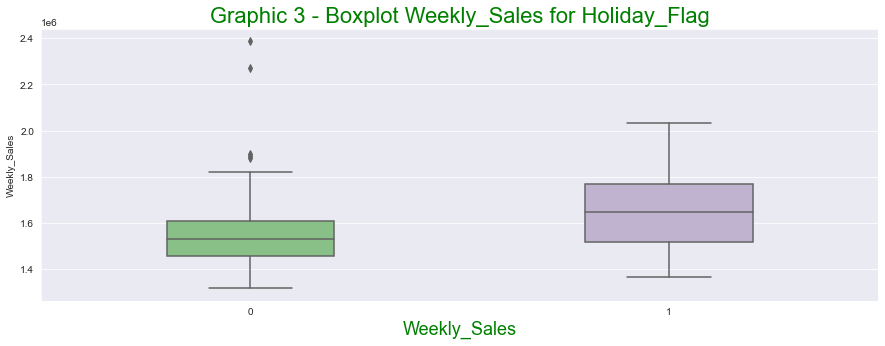

In [15]:
graphic3 = sns.boxplot(x=store_1['Holiday_Flag'], y=store_1['Weekly_Sales'], width=0.4,)
graphic3.figure.set_size_inches(15,5)
graphic3.set_title('Graphic 3 - Boxplot Weekly_Sales for Holiday_Flag', color='g', fontsize=22)
graphic3.set_xlabel('Weekly_Sales', color='g', fontsize=18)
graphic3 = graphic3

- holiday weeks has 5 times higher, according desciption
- solution: balance the weight of that weeks = divide sales for 5

### balance Weekly_Sales

In [16]:
#create column Weekly_Sales_Weighted
flag_list = []
for flag in store_1['Holiday_Flag']:
    if flag == 0:
        flag_list.append(1)
    else:
        flag_list.append(5)
store_1['flag_weight'] = np.asarray(flag_list)
store_1['Weekly_Sales_Weighted'] = store_1['Weekly_Sales'] / store_1['flag_weight']

#check
flag_weight_1 = store_1.query('flag_weight==1')['Holiday_Flag'].unique()
flag_weight_2 = store_1.query('flag_weight==5')['Holiday_Flag'].unique()

print(f'If flag_weight==1, Holiday_Flag must be only 0 - result = {flag_weight_1}')
print(f'If flag_weight==5, Holiday_Flag must be only 1 - result = {flag_weight_2}')

If flag_weight==1, Holiday_Flag must be only 0 - result = [0]
If flag_weight==5, Holiday_Flag must be only 1 - result = [1]


In [17]:
#drop column flag_weight
store_1.drop(columns=['flag_weight'], inplace=True)

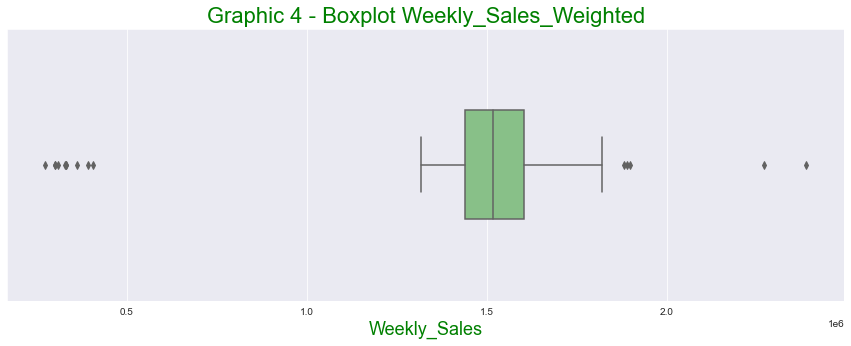

In [18]:
graphic4 = sns.boxplot(store_1['Weekly_Sales_Weighted'], width=0.4)
graphic4.figure.set_size_inches(15,5)
graphic4.set_title('Graphic 4 - Boxplot Weekly_Sales_Weighted', color='g', fontsize=22)
graphic4.set_xlabel('Weekly_Sales', color='g', fontsize=18)
graphic4 = graphic4

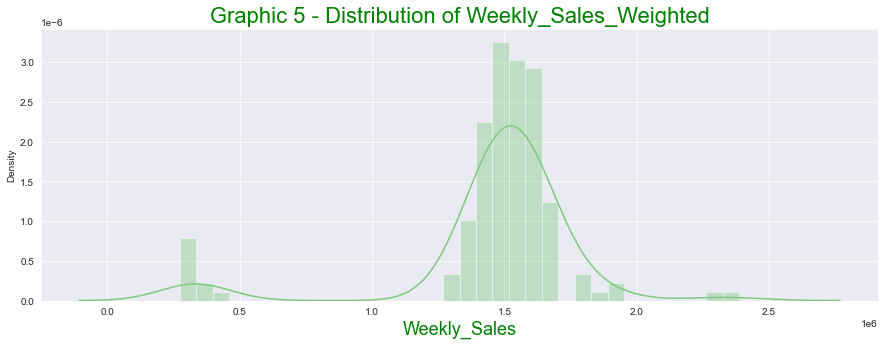

In [19]:
graphic5 = sns.distplot(store_1['Weekly_Sales_Weighted'])
graphic5.figure.set_size_inches(15,5)
graphic5.set_title('Graphic 5 - Distribution of Weekly_Sales_Weighted', color='g', fontsize=22)
graphic5.set_xlabel('Weekly_Sales', color='g', fontsize=18)
graphic5 = graphic5

- seems create a variable Weekly_Sales_Weighted does not solve the problem, because created more outliers

### outliers Weekly_Sales

In [20]:
#seek outliers
def limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    interval_inter_quantile = q3 - q1
    inferior_limit = q1 - 1.5 * interval_inter_quantile
    superior_limit = q3 + 1.5 * interval_inter_quantile
    results = np.asarray([q1, q3, interval_inter_quantile, inferior_limit, superior_limit])
    index = ['Q1', 'Q3', 'Interval Inter Quantile', 'Inferior limit', 'Superior limit']
    return pd.Series(data=results, index=index)

In [21]:
limits(store_1['Weekly_Sales'])

Q1                         1458104.69
Q3                         1614892.03
Interval Inter Quantile     156787.34
Inferior limit             1222923.68
Superior limit             1850073.04
dtype: float64

In [22]:
#insert median value in all outliers
weekly_sales_adjusted = []
for value in store_1['Weekly_Sales'].values:
    if value < limits(store_1['Weekly_Sales']).loc['Inferior limit']:
        weekly_sales_adjusted.append(store_1['Weekly_Sales'].median())
    elif value > limits(store_1['Weekly_Sales']).loc['Superior limit']:
        weekly_sales_adjusted.append(store_1['Weekly_Sales'].median())
    else:
        weekly_sales_adjusted.append(value)
store_1['Weekly_Sales_Adjusted'] = np.asarray(weekly_sales_adjusted)

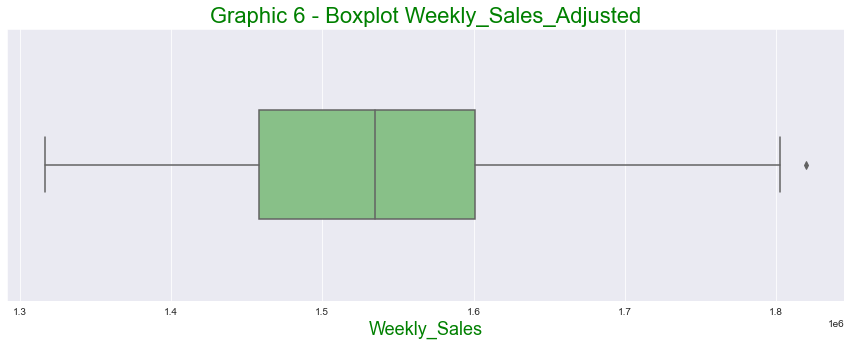

In [23]:
graphic6 = sns.boxplot(store_1['Weekly_Sales_Adjusted'], width=0.4)
graphic6.figure.set_size_inches(15,5)
graphic6.set_title('Graphic 6 - Boxplot Weekly_Sales_Adjusted', color='g', fontsize=22)
graphic6.set_xlabel('Weekly_Sales', color='g', fontsize=18)
graphic6 = graphic6

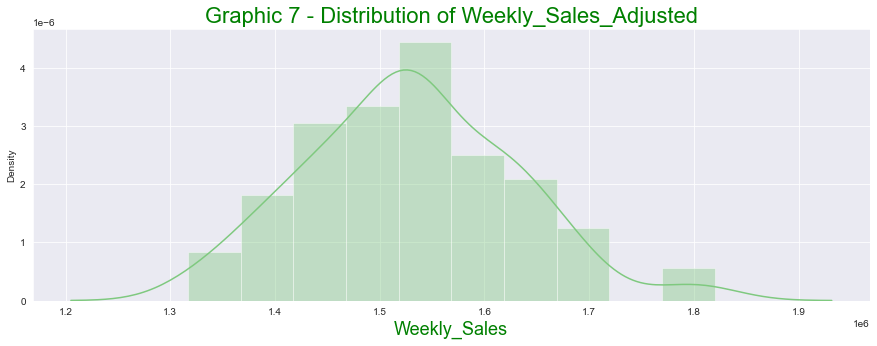

In [24]:
graphic7 = sns.distplot(store_1['Weekly_Sales_Adjusted'])
graphic7.figure.set_size_inches(15,5)
graphic7.set_title('Graphic 7 - Distribution of Weekly_Sales_Adjusted', color='g', fontsize=22)
graphic7.set_xlabel('Weekly_Sales', color='g', fontsize=18)
graphic7 = graphic7

- this method was more efficient to ajust Weekly_sales variable
- rest one outlier, but its location is near the superior limit

### correlation

In [25]:
store_1.corr()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Week_Number,Weekly_Sales_Weighted,Weekly_Sales_Adjusted
Weekly_Sales,1.000000,0.194905,-0.222701,0.124592,0.225408,-0.097955,-0.271685,0.202188,0.152396,0.214539,0.219573,0.652402
Holiday_Flag,0.194905,1.000000,-0.200543,-0.085903,-0.028919,0.082949,0.044526,0.122996,-0.056783,-0.013285,-0.907313,0.119128
Temperature,-0.222701,-0.200543,1.000000,0.228493,0.118503,-0.180695,0.051077,0.246417,0.068843,0.154069,0.096445,-0.120128
Fuel_Price,0.124592,-0.085903,0.228493,1.000000,0.755259,-0.513944,0.030806,-0.101256,0.809769,0.781789,0.139669,0.268617
CPI,0.225408,-0.028919,0.118503,0.755259,1.000000,-0.813471,0.033588,0.050952,0.948141,0.973943,0.124307,0.358308
Unemployment,-0.097955,0.082949,-0.180695,-0.513944,-0.813471,1.000000,-0.018342,0.040821,-0.798149,-0.791222,-0.124251,-0.262076
Day,-0.271685,0.044526,0.051077,0.030806,0.033588,-0.018342,1.000000,0.015192,0.006406,0.041930,-0.169237,-0.568759
Month,0.202188,0.122996,0.246417,-0.101256,0.050952,0.040821,0.015192,1.000000,-0.194465,0.145651,-0.026541,-0.031454
Year,0.152396,-0.056783,0.068843,0.809769,0.948141,-0.798149,0.006406,-0.194465,1.000000,0.941668,0.119337,0.336045
Week_Number,0.214539,-0.013285,0.154069,0.781789,0.973943,-0.791222,0.041930,0.145651,0.941668,1.000000,0.105541,0.310874


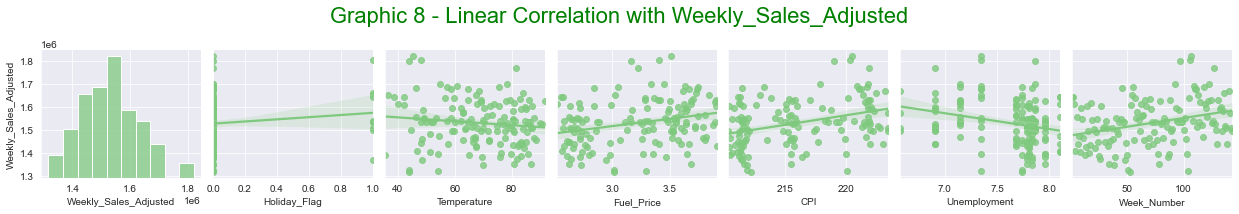

In [26]:
graphic8 = sns.pairplot(
    data=store_1,
    y_vars='Weekly_Sales_Adjusted', 
    x_vars=['Weekly_Sales_Adjusted','Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week_Number'],
    kind='reg'
)
graphic8.fig.suptitle('Graphic 8 - Linear Correlation with Weekly_Sales_Adjusted', color='g', fontsize=22, y=1.15)
graphic8 = graphic8

- seems the Weekly_Sales_Adjusted (with change outliers for median) is more effective to ajust data
- correlation with variables is weak yet and the data is to sparse

### log

### create a new dataset with numeric variables in log

In [27]:
# new empty dataframe
log_store_1 = pd.DataFrame()

#transform variables in log
log_store_1['log_Weekly_Sales'] = np.log(store_1['Weekly_Sales'])
log_store_1['log_Weekly_Sales_Adjusted'] = np.log(store_1['Weekly_Sales_Adjusted'])
log_store_1['log_Temperature'] = np.log(store_1['Temperature'])
log_store_1['log_Fuel_Price'] = np.log(store_1['Fuel_Price'])
log_store_1['log_CPI'] = np.log(store_1['CPI'])
log_store_1['log_Unemployment'] = np.log(store_1['Unemployment'])
log_store_1['log_Week_Number'] = np.log(store_1['Week_Number'])
log_store_1['Date'] = store_1['Date']

#sort dataframe from Date
log_store_1.sort_values('Date', inplace=True)

#new column with weight
log_store_1['Week_Number'] = np.asarray([x for x in range(1,144)])
log_store_1['log_Week_Number'] = np.log(log_store_1['Week_Number'])

In [28]:
log_store_1.corr()

,log_Weekly_Sales,log_Weekly_Sales_Adjusted,log_Temperature,log_Fuel_Price,log_CPI,log_Unemployment,log_Week_Number,Week_Number
log_Weekly_Sales,1.000000,0.718839,-0.202780,0.153148,0.249978,-0.118737,-0.222127,-0.317168
log_Weekly_Sales_Adjusted,0.718839,1.000000,-0.109423,0.271749,0.358232,-0.259749,-0.429821,-0.578267
log_Temperature,-0.202780,-0.109423,1.000000,0.236810,0.141731,-0.204566,0.025285,0.066049
log_Fuel_Price,0.153148,0.271749,0.236810,1.000000,0.766245,-0.511709,0.007848,0.024786
log_CPI,0.249978,0.358232,0.141731,0.766245,1.000000,-0.809359,0.023406,0.031953
log_Unemployment,-0.118737,-0.259749,-0.204566,-0.511709,-0.809359,1.000000,-0.023705,-0.016658
log_Week_Number,-0.222127,-0.429821,0.025285,0.007848,0.023406,-0.023705,1.000000,0.890470
Week_Number,-0.317168,-0.578267,0.066049,0.024786,0.031953,-0.016658,0.890470,1.000000


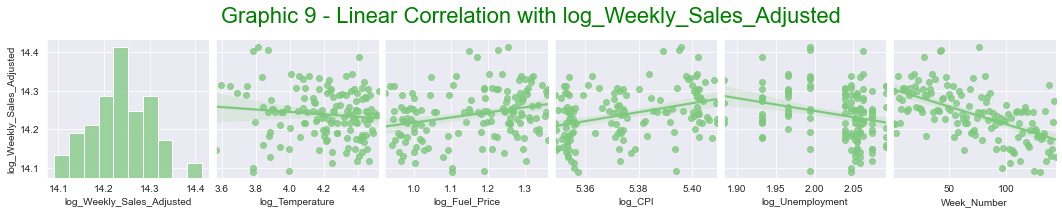

In [29]:
graphic9 = sns.pairplot(
    data=log_store_1,
    y_vars='log_Weekly_Sales_Adjusted', 
    x_vars=['log_Weekly_Sales_Adjusted', 'log_Temperature', 'log_Fuel_Price', 'log_CPI', 'log_Unemployment', 'Week_Number'],
    kind='reg'
)
graphic9.fig.suptitle('Graphic 9 - Linear Correlation with log_Weekly_Sales_Adjusted', color='g', fontsize=22, y=1.15)
graphic9 = graphic9

- log numeric variables did not created more correlation with Weekly_Sales_Adjusted and other variables
- my decision is use the numeric variables in abs state and adjust with scaler when run model

### prepare dataset

In [30]:
store_1.drop(columns=['Date', 'Day', 'Month', 'Year', 'Weekly_Sales_Weighted'], inplace=True)

## Test 1 - all independent variables

### variables

In [31]:
# dependent variable
y = store_1['Weekly_Sales_Adjusted']
#independent variables (for sklearn)
x = store_1[['Holiday_Flag', 'Week_Number', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
#independent variables (for statsmodels)
x_constant = sm.add_constant(x)

### Statsmodels

### formal results

In [32]:
model = sm.OLS(y, x_constant, hasconst=True).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Weekly_Sales_Adjusted   R-squared:                       0.196
Model:                               OLS   Adj. R-squared:                  0.161
Method:                    Least Squares   F-statistic:                     5.527
Date:                   Fri, 26 Mar 2021   Prob (F-statistic):           3.76e-05
Time:                           10:50:32   Log-Likelihood:                -1834.0
No. Observations:                    143   AIC:                             3682.
Df Residuals:                        136   BIC:                             3703.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -3.6

### graphic results

In [33]:
#create columns in dataframe
store_1['y_predict'] = model.predict(x_constant)
store_1['resid'] = model.resid

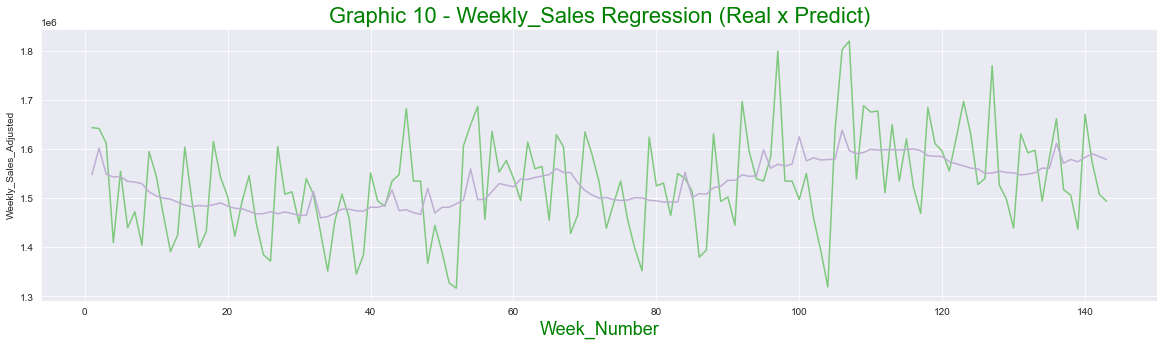

In [34]:
graphic10 = sns.lineplot(y=store_1['Weekly_Sales_Adjusted'], x=store_1['Week_Number'])
graphic10 = sns.lineplot(y=store_1['y_predict'], x=store_1['Week_Number'])
graphic10.figure.set_size_inches(20,5)
graphic10.set_title('Graphic 10 - Weekly_Sales Regression (Real x Predict)', color='g', fontsize=22)
graphic10.set_xlabel('Week_Number', color='g', fontsize=18)
graphic10 = graphic10

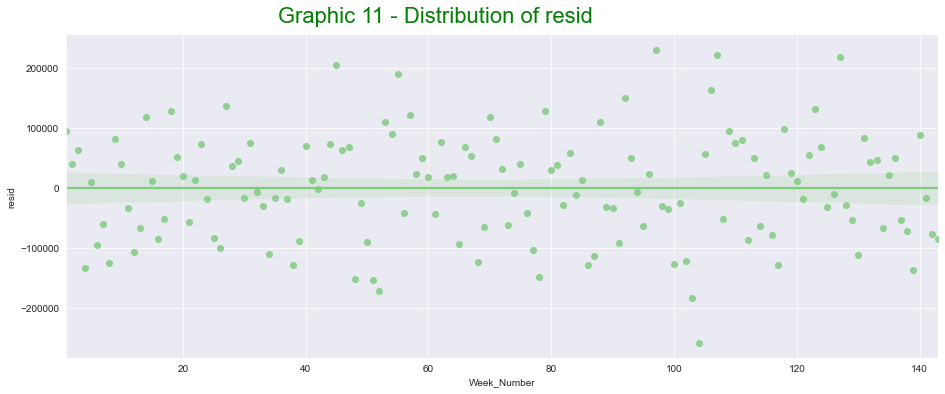

In [35]:
graphic11 = sns.lmplot(data=store_1, x='Week_Number', y='resid')
graphic11.fig.set_size_inches(15,5)
graphic11.fig.suptitle('Graphic 11 - Distribution of resid', color='g', fontsize=22, y=1.05)
graphic11 = graphic11

- the model reached a good F-statistcs but R² if very tiny
- some independent variables has big values in t test

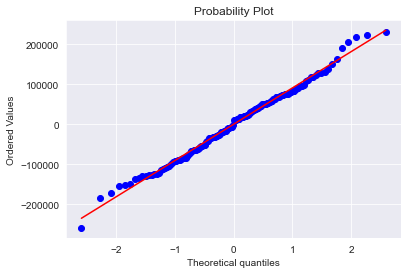

In [36]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

(_, (_,_,_)) = probplot(store_1['resid'], plot=plt)

## Test 2 - only Week_Number and CPI

### variables

In [37]:
# dependent variable
y = store_1['Weekly_Sales_Adjusted']
#independent variables (for sklearn)
x = store_1[['Week_Number', 'CPI']]
#independent variables (for statsmodels)
x_constant = sm.add_constant(x)

### Statsmodels

### formal results

In [38]:
model = sm.OLS(y, x_constant, hasconst=True).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Weekly_Sales_Adjusted   R-squared:                       0.157
Model:                               OLS   Adj. R-squared:                  0.145
Method:                    Least Squares   F-statistic:                     13.00
Date:                   Fri, 26 Mar 2021   Prob (F-statistic):           6.64e-06
Time:                           10:50:34   Log-Likelihood:                -1837.5
No. Observations:                    143   AIC:                             3681.
Df Residuals:                        140   BIC:                             3690.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.733e+

### graphic results

In [39]:
#create columns in dataframe
store_1['y_predict'] = model.predict(x_constant)
store_1['resid'] = model.resid

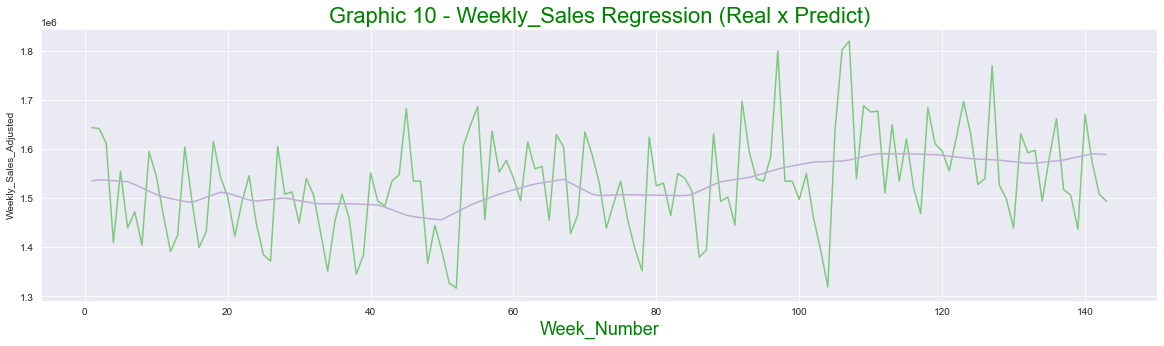

In [40]:
graphic10 = sns.lineplot(y=store_1['Weekly_Sales_Adjusted'], x=store_1['Week_Number'])
graphic10 = sns.lineplot(y=store_1['y_predict'], x=store_1['Week_Number'])
graphic10.figure.set_size_inches(20,5)
graphic10.set_title('Graphic 10 - Weekly_Sales Regression (Real x Predict)', color='g', fontsize=22)
graphic10.set_xlabel('Week_Number', color='g', fontsize=18)
graphic10 = graphic10

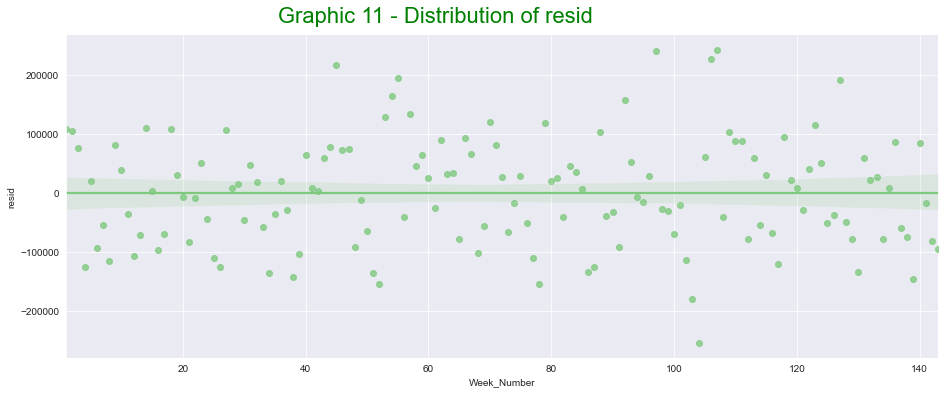

In [41]:
graphic11 = sns.lmplot(data=store_1, x='Week_Number', y='resid')
graphic11.fig.set_size_inches(15,5)
graphic11.fig.suptitle('Graphic 11 - Distribution of resid', color='g', fontsize=22, y=1.05)
graphic11 = graphic11

- the model reached a good F-statistcs but R² if very tiny
- some independent variables has big values in t test

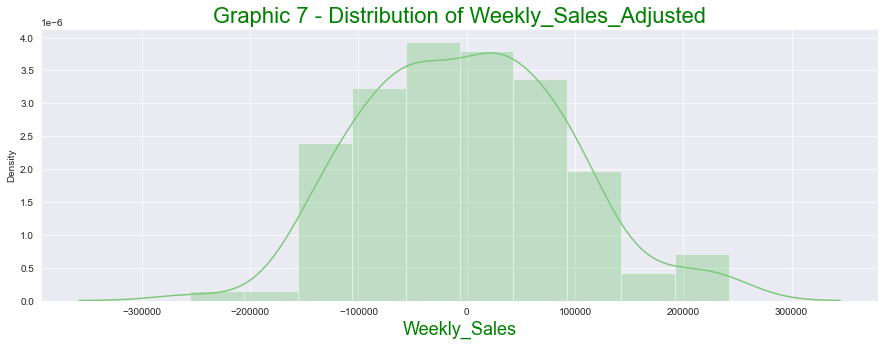

In [42]:
graphic7 = sns.distplot(store_1['resid'])
graphic7.figure.set_size_inches(15,5)
graphic7.set_title('Graphic 7 - Distribution of Weekly_Sales_Adjusted', color='g', fontsize=22)
graphic7.set_xlabel('Weekly_Sales', color='g', fontsize=18)
graphic7 = graphic7

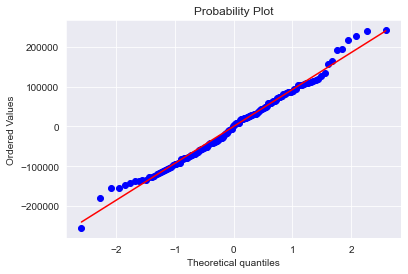

In [43]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

(_, (_,_,_)) = probplot(store_1['resid'], plot=plt)

## Test 3 - only Week_Number, CPI and Temperature

### variables

In [44]:
# dependent variable
y = store_1['Weekly_Sales_Adjusted']
#independent variables (for sklearn)
x = store_1[['Week_Number', 'CPI', 'Temperature']]
#independent variables (for statsmodels)
x_constant = sm.add_constant(x)

### Statsmodels

### formal results

In [45]:
model = sm.OLS(y, x_constant, hasconst=True).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Weekly_Sales_Adjusted   R-squared:                       0.175
Model:                               OLS   Adj. R-squared:                  0.158
Method:                    Least Squares   F-statistic:                     9.853
Date:                   Fri, 26 Mar 2021   Prob (F-statistic):           6.20e-06
Time:                           10:50:36   Log-Likelihood:                -1835.8
No. Observations:                    143   AIC:                             3680.
Df Residuals:                        139   BIC:                             3692.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.255e+

### graphic results

In [46]:
#create columns in dataframe
store_1['y_predict'] = model.predict(x_constant)
store_1['resid'] = model.resid

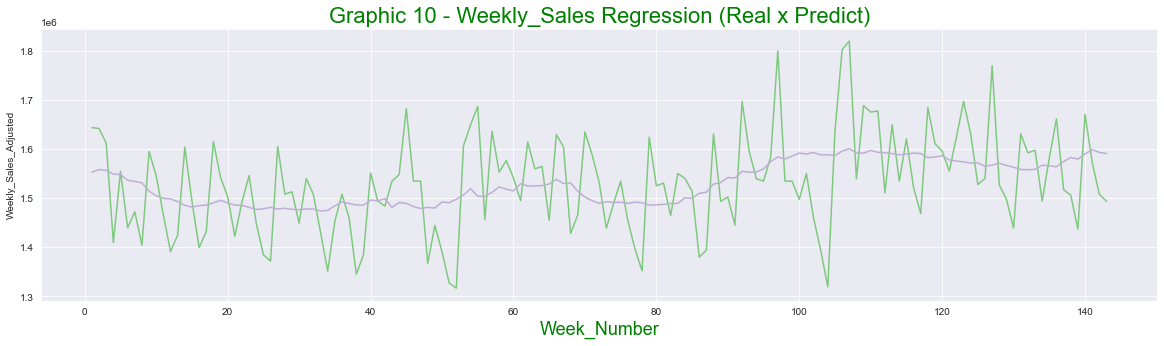

In [47]:
graphic10 = sns.lineplot(y=store_1['Weekly_Sales_Adjusted'], x=store_1['Week_Number'])
graphic10 = sns.lineplot(y=store_1['y_predict'], x=store_1['Week_Number'])
graphic10.figure.set_size_inches(20,5)
graphic10.set_title('Graphic 10 - Weekly_Sales Regression (Real x Predict)', color='g', fontsize=22)
graphic10.set_xlabel('Week_Number', color='g', fontsize=18)
graphic10 = graphic10

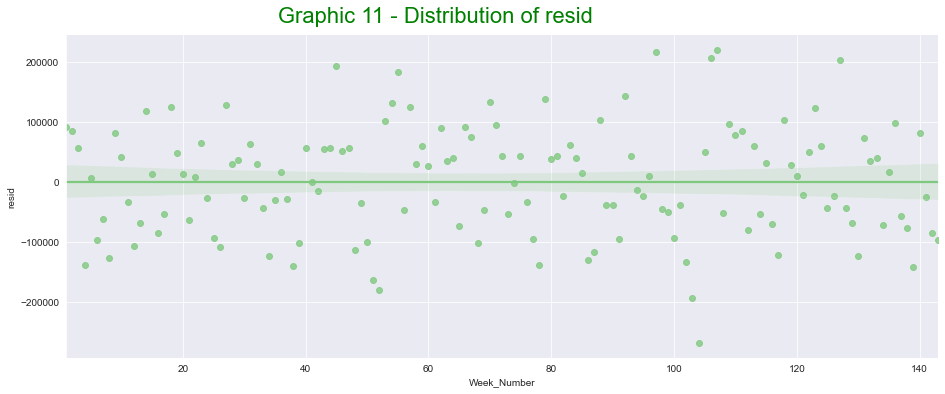

In [48]:
graphic11 = sns.lmplot(data=store_1, x='Week_Number', y='resid')
graphic11.fig.set_size_inches(15,5)
graphic11.fig.suptitle('Graphic 11 - Distribution of resid', color='g', fontsize=22, y=1.05)
graphic11 = graphic11

- the model reached a good F-statistcs but R² if very tiny
- some independent variables has big values in t test

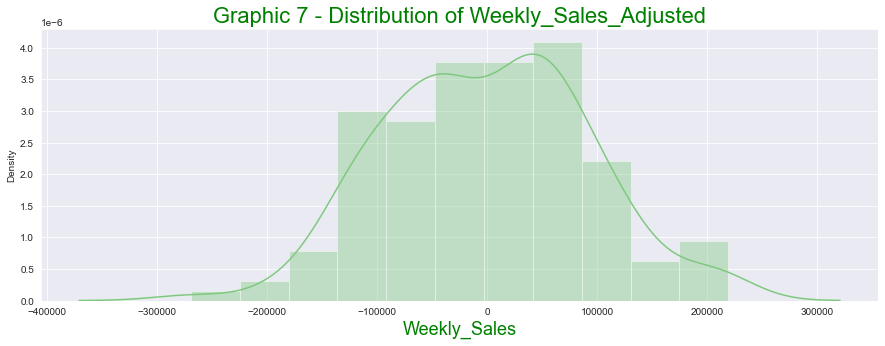

In [49]:
graphic7 = sns.distplot(store_1['resid'])
graphic7.figure.set_size_inches(15,5)
graphic7.set_title('Graphic 7 - Distribution of Weekly_Sales_Adjusted', color='g', fontsize=22)
graphic7.set_xlabel('Weekly_Sales', color='g', fontsize=18)
graphic7 = graphic7

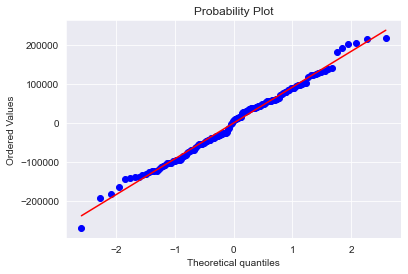

In [50]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

(_, (_,_,_)) = probplot(store_1['resid'], plot=plt)

# Conclusion

- TEST 3 is the best model because R² is bigger then all tests, F-statistics is very tiny and distribution of resids in normal
- adjusted R² is only 0.158 because the volume of data for Store 1 is not enought and outliers make "very noise"